In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
import math
import os

getcontext().prec = 50

In [2]:
# Tipos!!

angulo = Decimal
meters = Decimal

# Calibración

Primero necesitamos encontrar la calibración para cada una de las dos sesiones

In [3]:
angulo_que_maximiza_teorico: Angulo = Decimal("22.6")
angulo_que_maximiza_dia_1: Angulo = Decimal("20.8")
angulo_que_maximiza_dia_2: Angulo = Decimal("20.1")


desviacion_dia_1 = angulo_que_maximiza_teorico - angulo_que_maximiza_dia_1
desviacion_dia_2 = angulo_que_maximiza_teorico - angulo_que_maximiza_dia_2

# Actividad 1

In [4]:
def detect_local_max(index: int, vals, threshold = 1000):
    more = vals[index + 1] if index + 1 < len(vals) else 0
    less = vals[index - 1] if index - 1 >= 0 else 0
    val = vals[index] if 0 <= index < len(vals) else 0
    return val > more and val > less and threshold < val

def convertir_a_lambda(theta, d: milimeters = Decimal(2.014e-7), m = 1):
    angulo = np.radians(theta)
    return (2 * d * Decimal(np.sin(angulo))) / m

In [5]:
data_actividad_1 = pd.read_csv("./data/Actividad1-rayosX.txt")
data_actividad_1["R(35kV)/Imp/s"] = data_actividad_1["R(35kV)/Imp/s"] + float(desviacion_dia_1)
  
data_actividad_1["lambda/m"] = [float(convertir_a_lambda(val)) for val in data_actividad_1["theta/Grads"]]

In [6]:
local_maxs = [i for i, _ in enumerate(data_actividad_1["R(35kV)/Imp/s"]) if detect_local_max(i, data_actividad_1["R(35kV)/Imp/s"]) and i > 100]
print(f"Los maximos ocurren en:")
for lmax in local_maxs:
    print(f"\t{data_actividad_1["lambda/m"][lmax]}")

Los maximos ocurren en:
	1.278103155999711e-07
	1.430370844579976e-07
	3.0027773267225693e-07


<function matplotlib.pyplot.show(close=None, block=None)>

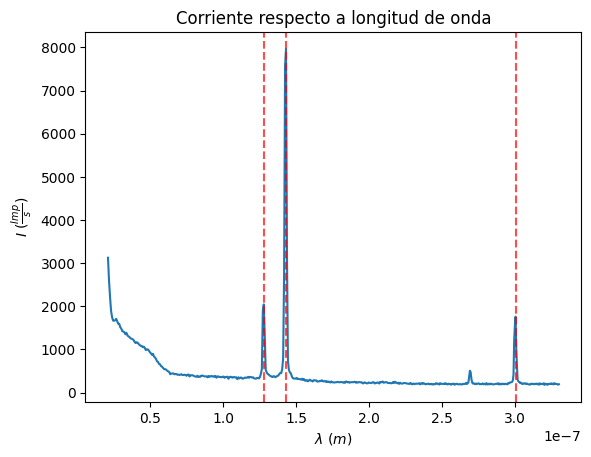

In [7]:
plt.plot(data_actividad_1["lambda/m"], data_actividad_1["R(35kV)/Imp/s"])

for idx in local_maxs:
    if idx < len(data_actividad_1):  # Verificar que el índice sea válido
        x_val = data_actividad_1["lambda/m"].iloc[idx]
        plt.axvline(x=x_val, color='red', linestyle='--', alpha=0.7, 
                   label='Máximo local' if idx == local_maxs[0] else "")
plt.title("Corriente respecto a longitud de onda")
plt.xlabel(r"$\lambda$ ($m$)")
plt.ylabel(r"$I$ ($\frac{Imp}{s}$)")
plt.show

# Actividad 2

In [8]:
# DATA
data_actividad_2 = pd.read_csv("./data/Actividad_2.txt")

In [9]:
grouped = data_actividad_2.groupby(['material', 'theta/Grads'])

## IMPORTANTE!!! AQUI ESTAN LAS REGRESIONEEEES: PARA QUE LAS MIRES EN EL PROCESAMIENTOOOOO
regresiones = {}
for i, (name, group) in enumerate(grouped):
    material, theta = name
    group = group.sort_values('grosor/mm')
    regresiones[f'{material}, {theta}°'] = np.polyfit(group['grosor/mm'], group['R(30kV)/Imp/s'], 3)
regresiones

{'Al, 6.0°': array([10416.66666666, 27410.71428572, -6805.95238095,   758.2       ]),
 'Al, 7.0°': array([-104166.66666667,   44464.28571429,   -7019.04761905,
            677.4       ]),
 'Al, 8.0°': array([-93750. ,  33125. ,  -4550. ,    460.4]),
 'Al, 9.0°': array([-62500.        ,  18392.85714286,  -2307.14285714,    300.4       ]),
 'Al, 10.0°': array([-52083.33333334,  12946.42857143,  -1570.23809524,    251.2       ]),
 'Al, 11.0°': array([-20833.33333334,   9285.71428571,  -1505.95238095,    248.8       ]),
 'Al, 12.0°': array([-20833.33333333,   6607.14285714,  -1159.52380952,    225.6       ]),
 'Zn, 6.0°': array([-7.25333333e+05,  1.81600000e+05, -1.68466667e+04,  6.20000000e+02]),
 'Zn, 7.0°': array([-6.720e+05,  1.680e+05, -1.538e+04,  5.470e+02]),
 'Zn, 8.0°': array([-4.90666667e+05,  1.19200000e+05, -1.05533333e+04,  3.65000000e+02]),
 'Zn, 9.0°': array([-3.09333333e+05,  7.52000000e+04, -6.72666667e+03,  2.38000000e+02]),
 'Zn, 10.0°': array([-2.13333333e+05,  5.360000

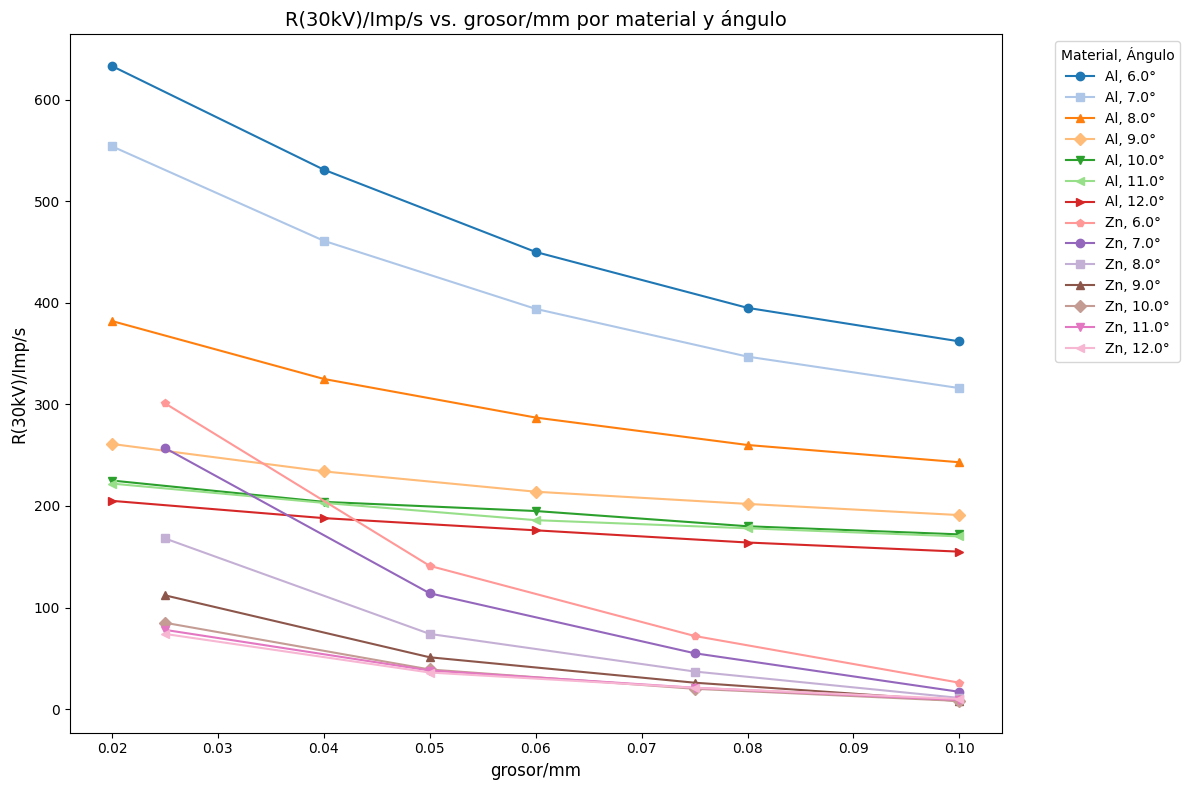

In [10]:
plt.figure(figsize=(12, 8))
# Colores y marcadores para diferenciar líneas (opcional)
colors = plt.cm.tab20.colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

# Iterar sobre cada grupo para trazar una línea
for i, (name, group) in enumerate(grouped):
    material, theta = name
    # Ordenar por grosor para asegurar que la línea se trace en orden
    group = group.sort_values('grosor/mm')
    # Seleccionar color y marcador cíclicamente
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    plt.plot(group['grosor/mm'], group['R(30kV)/Imp/s'], 
             marker=marker, linestyle='-', color=color, 
             label=f'{material}, {theta}°')

# Personalizar el gráfico
plt.xlabel('grosor/mm', fontsize=12)
plt.ylabel('R(30kV)/Imp/s', fontsize=12)
plt.title('R(30kV)/Imp/s vs. grosor/mm por material y ángulo', fontsize=14)
plt.legend(title='Material, Ángulo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

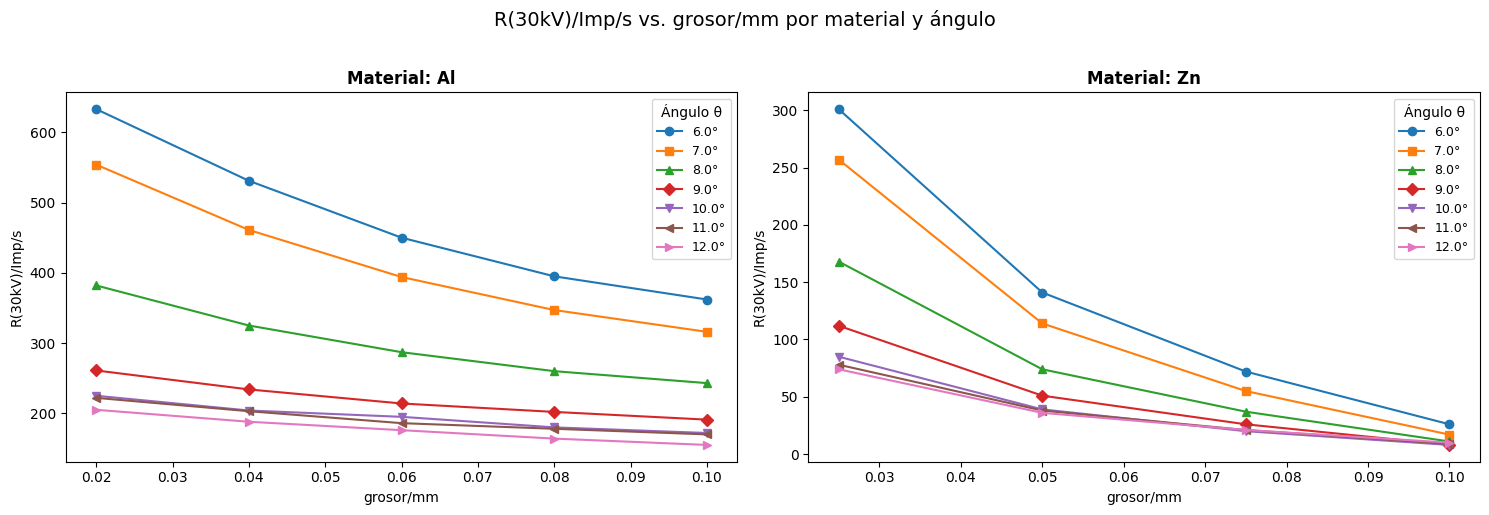

In [11]:
materiales_unicos = data_actividad_2['material'].unique()
n_materiales = len(materiales_unicos)

# Calcular disposición de grid (filas y columnas)
n_cols = min(2, n_materiales)  # Máximo 2 columnas
n_rows = math.ceil(n_materiales / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Aplanar para fácil iteración

# Colores y marcadores
colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

# Para cada material
for idx in range(len(axes)):
    if idx < n_materiales:
        material = materiales_unicos[idx]
        ax = axes[idx]
        
        # Filtrar datos para este material
        material_data = data_actividad_2[data_actividad_2['material'] == material]
        
        # Agrupar por ángulo theta
        theta_groups = material_data.groupby('theta/Grads')
        
        # Iterar sobre cada ángulo theta
        for i, (theta, group) in enumerate(theta_groups):
            # Ordenar por grosor
            group = group.sort_values('grosor/mm')
            
            # Seleccionar color y marcador
            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]
            
            ax.plot(group['grosor/mm'], group['R(30kV)/Imp/s'], 
                    marker=marker, linestyle='-', color=color, 
                    label=f'{theta}°')
        
        # Personalizar cada subplot
        ax.set_xlabel('grosor/mm', fontsize=10)
        ax.set_ylabel('R(30kV)/Imp/s', fontsize=10)
        ax.set_title(f'Material: {material}', fontsize=12, fontweight='bold')
        ax.legend(title='Ángulo θ', fontsize=9)
    else:
        # Ocultar ejes extras si no hay material para ellos
        axes[idx].axis('off')

plt.suptitle('R(30kV)/Imp/s vs. grosor/mm por material y ángulo', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Actividad 3
## Voltajer Variable

In [12]:
data_actividad_3 = pd.read_csv("./data/Actividad_3.txt")
data_actividad_3['lambda/mm'] = [float(convertir_a_lambda(val / 2)) for val in data_actividad_3["2*theta/Grads"]]
data_actividad_3

,2*theta/Grads,R(35kV)/Imp/s,Corriente/mA,lambda/mm
0,32.0,30.0,0.1,1.110267e-07
1,32.2,32.0,0.1,1.117023e-07
2,32.4,33.0,0.1,1.123776e-07
3,32.5,31.0,0.1,1.127151e-07
4,32.8,30.0,0.1,1.137271e-07
...,...,...,...,...
805,47.2,260.0,1.0,1.612606e-07
806,47.4,269.0,1.0,1.619046e-07
807,47.6,258.0,1.0,1.625480e-07
808,47.8,280.0,1.0,1.631910e-07


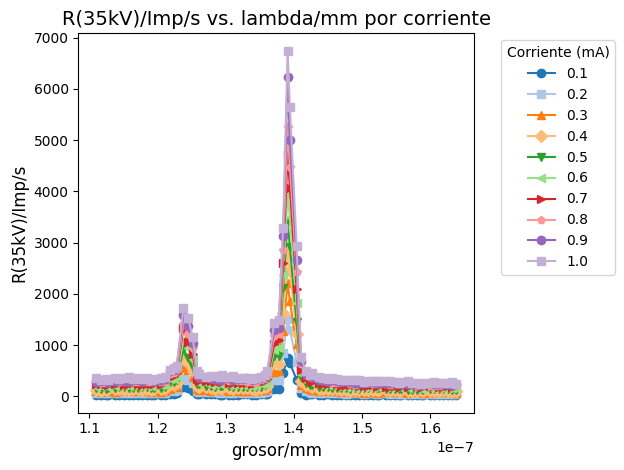

In [13]:
group_actividad_3 = data_actividad_3.groupby(['Corriente/mA'])
colors = plt.cm.tab20.colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

# Iterar sobre cada grupo para trazar una línea
for i, (name, group) in enumerate(group_actividad_3):
    corriente = name
    # Oferdenar por grosor para asegurar que la línea se trace en orden
    group = group.sort_values('lambda/mm')
    # Seleccionar color y marcador cíclicamente
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    plt.plot(group['lambda/mm'], group['R(35kV)/Imp/s'], 
             marker=marker, linestyle='-', color=color, 
             label=corriente)

# Personalizar el gráfico
plt.xlabel('grosor/mm', fontsize=12)
plt.ylabel('R(35kV)/Imp/s', fontsize=12)
plt.title('R(35kV)/Imp/s vs. lambda/mm por corriente', fontsize=14)
plt.legend(title='Corriente (mA)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [14]:
local_maxs_actividad_3_k_B = data_actividad_3[(data_actividad_3["2*theta/Grads"] == 35.8)]
local_maxs_actividad_3_k_alpha = data_actividad_3[(data_actividad_3["2*theta/Grads"] == 40.4)]
print(f"Los maximos ocurren en ({len(local_maxs_actividad_3_k_B)}):")
print(local_maxs_actividad_3_k_B)
print(f"Los maximos ocurren en ({len(local_maxs_actividad_3_k_alpha)}):")
print(local_maxs_actividad_3_k_alpha)

Los maximos ocurren en (10):
     2*theta/Grads  R(35kV)/Imp/s  Corriente/mA     lambda/mm
19            35.8          183.0           0.1  1.238032e-07
100           35.8          350.0           0.2  1.238032e-07
181           35.8          563.0           0.3  1.238032e-07
262           35.8          764.0           0.4  1.238032e-07
343           35.8          918.0           0.5  1.238032e-07
424           35.8         1096.0           0.6  1.238032e-07
505           35.8         1332.0           0.7  1.238032e-07
586           35.8         1417.0           0.8  1.238032e-07
667           35.8         1584.0           0.9  1.238032e-07
748           35.8         1730.0           1.0  1.238032e-07
Los maximos ocurren en (10):
     2*theta/Grads  R(35kV)/Imp/s  Corriente/mA     lambda/mm
42            40.4          748.0           0.1  1.390861e-07
123           40.4         1514.0           0.2  1.390861e-07
204           40.4         2212.0           0.3  1.390861e-07
285         

In [15]:
# Suponiendo que ya tienes estos DataFrames creados:
# local_maxs_actividad_3_k_B y local_maxs_actividad_3_k_alpha

# Extraer los datos directamente de los DataFrames
corriente_kB = local_maxs_actividad_3_k_B["Corriente/mA"].values
R_kB = local_maxs_actividad_3_k_B["R(35kV)/Imp/s"].values

corriente_kalpha = local_maxs_actividad_3_k_alpha["Corriente/mA"].values
R_kalpha = local_maxs_actividad_3_k_alpha["R(35kV)/Imp/s"].values

# Obtener los ángulos y longitudes de onda (deberían ser constantes)
angulo_kB = local_maxs_actividad_3_k_B["2*theta/Grads"].iloc[0]
lambda_kB = local_maxs_actividad_3_k_B["lambda/mm"].iloc[0] * 1e6  # Convertir a nm
angulo_kalpha = local_maxs_actividad_3_k_alpha["2*theta/Grads"].iloc[0]
lambda_kalpha = local_maxs_actividad_3_k_alpha["lambda/mm"].iloc[0] * 1e6  # Convertir a nm

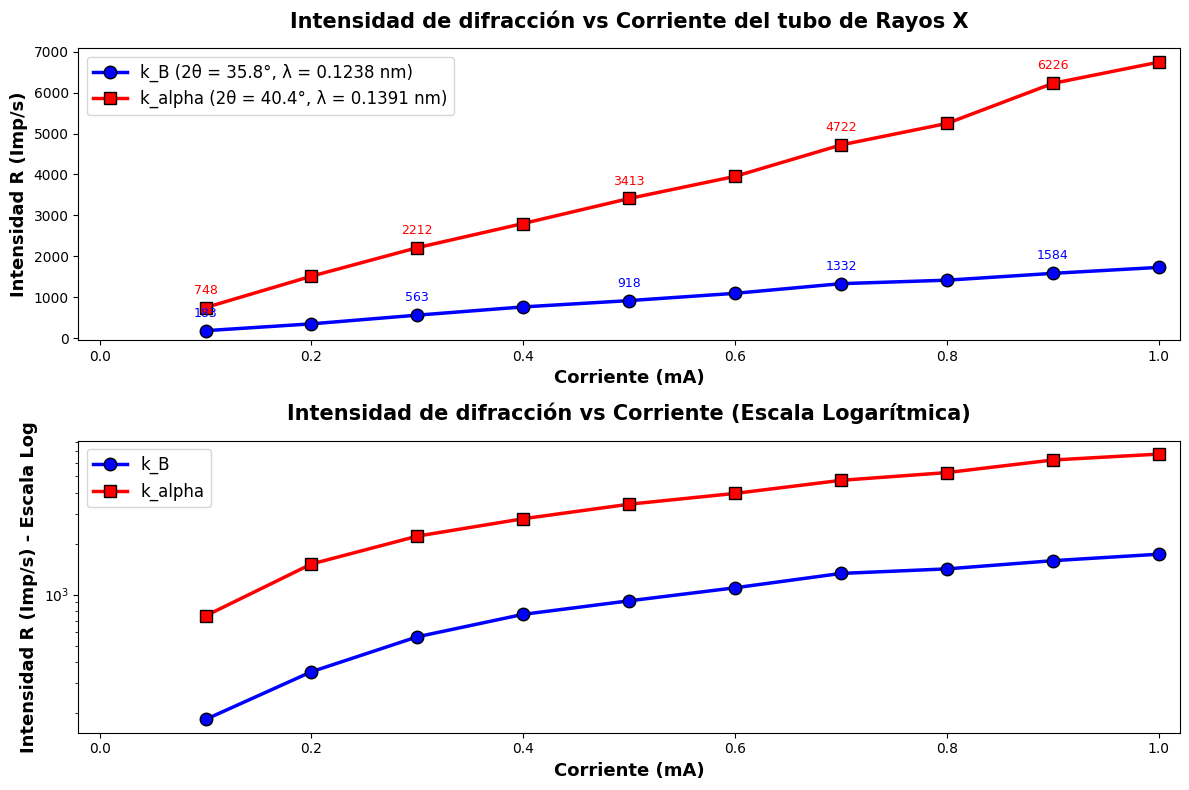

In [16]:
# Crear la gráfica principal
plt.figure(figsize=(12, 8))

# Gráfica 1: Escala lineal
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico

# Graficar k_B
plt.plot(corriente_kB, R_kB, 'o-', color='blue', linewidth=2.5, 
         markersize=9, markeredgecolor='black', markeredgewidth=1,
         label=f'k_B (2θ = {angulo_kB}°, λ = {lambda_kB:.4f} nm)')

# Graficar k_alpha
plt.plot(corriente_kalpha, R_kalpha, 's-', color='red', linewidth=2.5, 
         markersize=9, markeredgecolor='black', markeredgewidth=1,
         label=f'k_alpha (2θ = {angulo_kalpha}°, λ = {lambda_kalpha:.4f} nm)')

# Personalizar la gráfica
plt.xlabel('Corriente (mA)', fontsize=13, fontweight='bold')
plt.ylabel('Intensidad R (Imp/s)', fontsize=13, fontweight='bold')
plt.title('Intensidad de difracción vs Corriente del tubo de Rayos X', 
          fontsize=15, fontweight='bold', pad=15)
plt.grid(False)
plt.legend(fontsize=12, loc='upper left')
plt.xlim(-0.02, 1.02)
plt.ylim(-50, max(max(R_kB), max(R_kalpha)) * 1.05)

# Añadir valores de los puntos
for i, (x, y) in enumerate(zip(corriente_kB, R_kB)):
    if i % 2 == 0:  # Mostrar solo algunos para no saturar
        plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, color='blue')

for i, (x, y) in enumerate(zip(corriente_kalpha, R_kalpha)):
    if i % 2 == 0:
        plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, color='red')

# Gráfica 2: Escala logarítmica en Y
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico

plt.plot(corriente_kB, R_kB, 'o-', color='blue', linewidth=2.5, 
         markersize=9, markeredgecolor='black', markeredgewidth=1,
         label='k_B')
plt.plot(corriente_kalpha, R_kalpha, 's-', color='red', linewidth=2.5, 
         markersize=9, markeredgecolor='black', markeredgewidth=1,
         label='k_alpha')

plt.xlabel('Corriente (mA)', fontsize=13, fontweight='bold')
plt.ylabel('Intensidad R (Imp/s) - Escala Log', fontsize=13, fontweight='bold')
plt.title('Intensidad de difracción vs Corriente (Escala Logarítmica)', 
          fontsize=15, fontweight='bold', pad=15)
plt.grid(False)
plt.legend(fontsize=12, loc='upper left')
plt.xlim(-0.02, 1.02)
plt.yscale('log')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [17]:
# Ajuste lineal para k_B
coef_kB = np.polyfit(corriente_kB, R_kB, 1)
pendiente_kB = coef_kB[0]
intercepto_kB = coef_kB[1]

# Ajuste lineal para k_alpha
coef_kalpha = np.polyfit(corriente_kalpha, R_kalpha, 1)
pendiente_kalpha = coef_kalpha[0]
intercepto_kalpha = coef_kalpha[1]

print(f"\nLínea k_B:")
print(f"  • Ecuación: R = ({pendiente_kB:.1f} ± {np.std(R_kB)/np.sqrt(len(R_kB)):.1f}) * I + ({intercepto_kB:.1f})")
print(f"  • R²: {np.corrcoef(corriente_kB, R_kB)[0,1]**2:.4f}")
print(f"  • Rango: {min(R_kB):.0f} - {max(R_kB):.0f} Imp/s")

print(f"\nLínea k_alpha:")
print(f"  • Ecuación: R = ({pendiente_kalpha:.1f} ± {np.std(R_kalpha)/np.sqrt(len(R_kalpha)):.1f}) * I + ({intercepto_kalpha:.1f})")
print(f"  • R²: {np.corrcoef(corriente_kalpha, R_kalpha)[0,1]**2:.4f}")
print(f"  • Rango: {min(R_kalpha):.0f} - {max(R_kalpha):.0f} Imp/s")

print(f"\nComparación:")
print(f"  • Razón k_alpha/k_B (pendientes): {pendiente_kalpha/pendiente_kB:.2f}")
print(f"  • Razón k_alpha/k_B (@1.0 mA): {R_kalpha[-1]/R_kB[-1]:.2f}")
print(f"  • Diferencia en intensidad máxima: {max(R_kalpha) - max(R_kB):.0f} Imp/s")
print(f"  • Factor de mejora promedio: {np.mean(R_kalpha)/np.mean(R_kB):.2f}x")


Línea k_B:
  • Ecuación: R = (1740.2 ± 158.4) * I + (36.6)
  • R²: 0.9952
  • Rango: 183 - 1730 Imp/s

Línea k_alpha:
  • Ecuación: R = (6571.7 ± 597.6) * I + (143.9)
  • R²: 0.9976
  • Rango: 748 - 6745 Imp/s

Comparación:
  • Razón k_alpha/k_B (pendientes): 3.78
  • Razón k_alpha/k_B (@1.0 mA): 3.90
  • Diferencia en intensidad máxima: 5015 Imp/s
  • Factor de mejora promedio: 3.78x


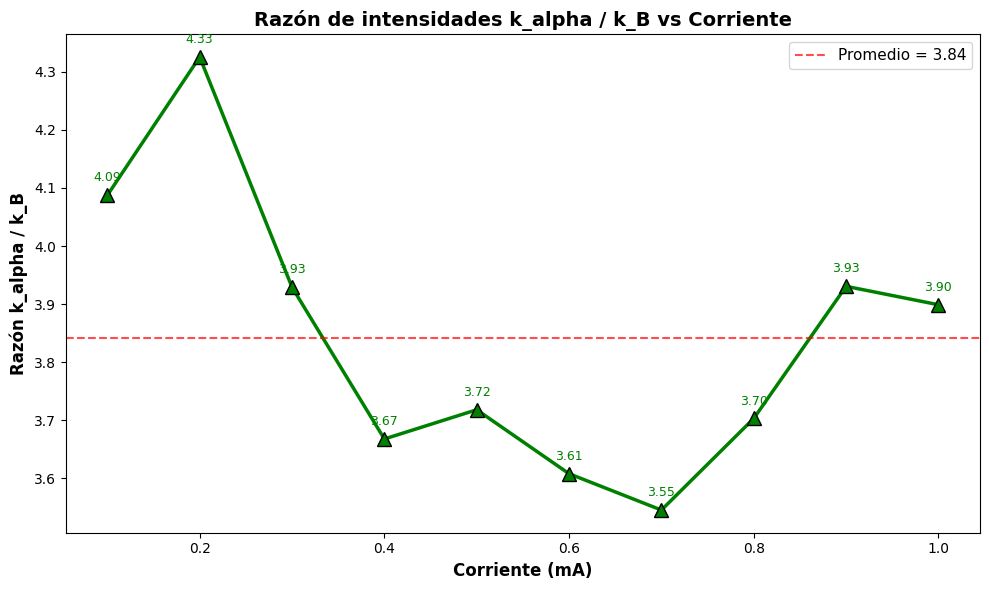

In [18]:
# Gráfica adicional: Razón k_alpha/k_B vs Corriente
plt.figure(figsize=(10, 6))

razon = np.array(R_kalpha) / np.array(R_kB)
plt.plot(corriente_kB, razon, '^-', color='green', linewidth=2.5, 
         markersize=10, markeredgecolor='black', markeredgewidth=1)

plt.xlabel('Corriente (mA)', fontsize=12, fontweight='bold')
plt.ylabel('Razón k_alpha / k_B', fontsize=12, fontweight='bold')
plt.title('Razón de intensidades k_alpha / k_B vs Corriente', 
          fontsize=14, fontweight='bold')
plt.grid(False)
plt.axhline(y=np.mean(razon), color='r', linestyle='--', alpha=0.7, 
            label=f'Promedio = {np.mean(razon):.2f}')

# Añadir valores
for i, (x, y) in enumerate(zip(corriente_kB, razon)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='green')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Actividad 4

In [19]:
data_actividad_4 = pd.read_csv("./data/Actividad4.txt")
data_actividad_4

,theta/Grads,R(23kV)/Imp/s,R(25kV)/Imp/s,R(27kV)/Imp/s,R(29kV)/Imp/s,R(31kV)/Imp/s,R(33kV)/Imp/s,R(35kV)/Imp/s
0,14.0,1.0,2.0,4.0,11.0,4.0,5.0,12.0
1,14.1,3.0,5.0,5.0,4.0,7.0,9.0,10.0
2,14.2,5.0,3.0,5.0,5.0,6.0,5.0,11.0
3,14.3,3.0,5.0,6.0,6.0,7.0,8.0,6.0
4,14.4,5.0,4.0,6.0,4.0,10.0,6.0,15.0
...,...,...,...,...,...,...,...,...
106,24.6,3.0,3.0,6.0,6.0,9.0,11.0,7.0
107,24.7,3.0,5.0,4.0,4.0,7.0,9.0,11.0
108,24.8,3.0,3.0,2.0,8.0,7.0,7.0,7.0
109,24.9,2.0,3.0,3.0,8.0,3.0,6.0,11.0
